# Try loading different datasets

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from load_datasets import get_dataset
import matplotlib.patches as patches
from IPython.display import Audio, display

## Tuberculosis dataset




In [3]:
x,y,file_names = get_dataset("tuberculosis")
x_pixel = x[:30].reshape(-1,3)


get_datasdet
aaaaaa
/Users/paul/CS/mva/ml4ts/Dictionary-Learning/src/dataset
/Users/paul/CS/mva/ml4ts/Dictionary-Learning/src/dataset ['__pycache__', 'data']


In [4]:
def add_labels(boxes, ax):
    for box in boxes:
        xmin,xmax,ymin,ymax, _ = box
        xmin,xmax,ymin,ymax = int(xmin),int(xmax),int(ymin),int(ymax)
        rectangle = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                         linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rectangle)

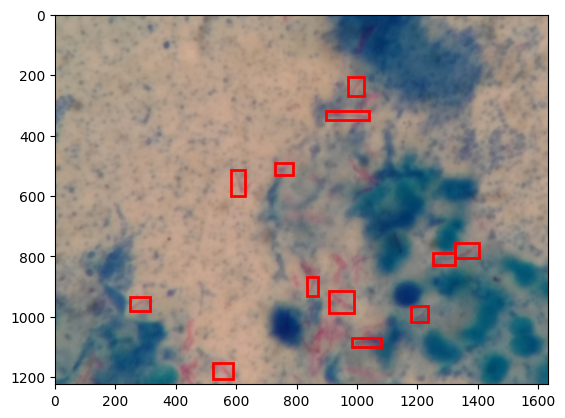

In [5]:
fix,ax = plt.subplots(1,1)
img_0 = x[0]
add_labels(y[0], ax)
ax.imshow(img_0)

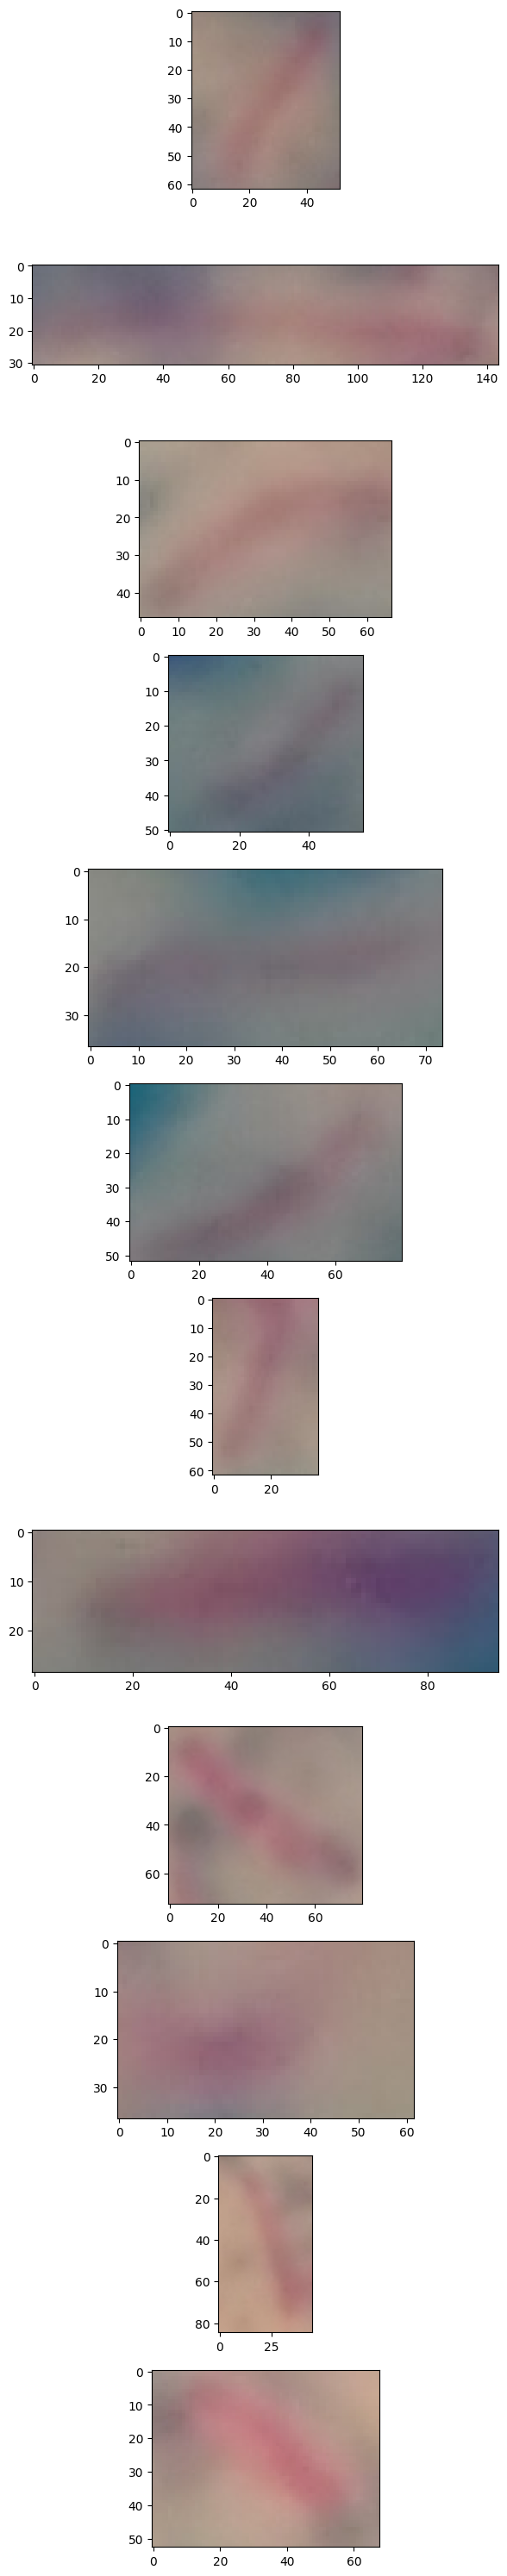

In [6]:
img_0 = x[0]
nb_box = len(y[0])
fix,ax = plt.subplots(nb_box,1, figsize=(6, 30))
for k,box in enumerate(y[0]):
    xmin,xmax,ymin,ymax, _ = box
    xmin,xmax,ymin,ymax = int(xmin),int(xmax),int(ymin),int(ymax)
    xmin, ymin = max(0, xmin), max(0, ymin)
    xmax, ymax = min(img_0.shape[1], xmax), min(img_0.shape[0], ymax)
    ax[k].imshow(img_0[ymin:ymax, xmin:xmax])

plt.tight_layout()
plt.show()

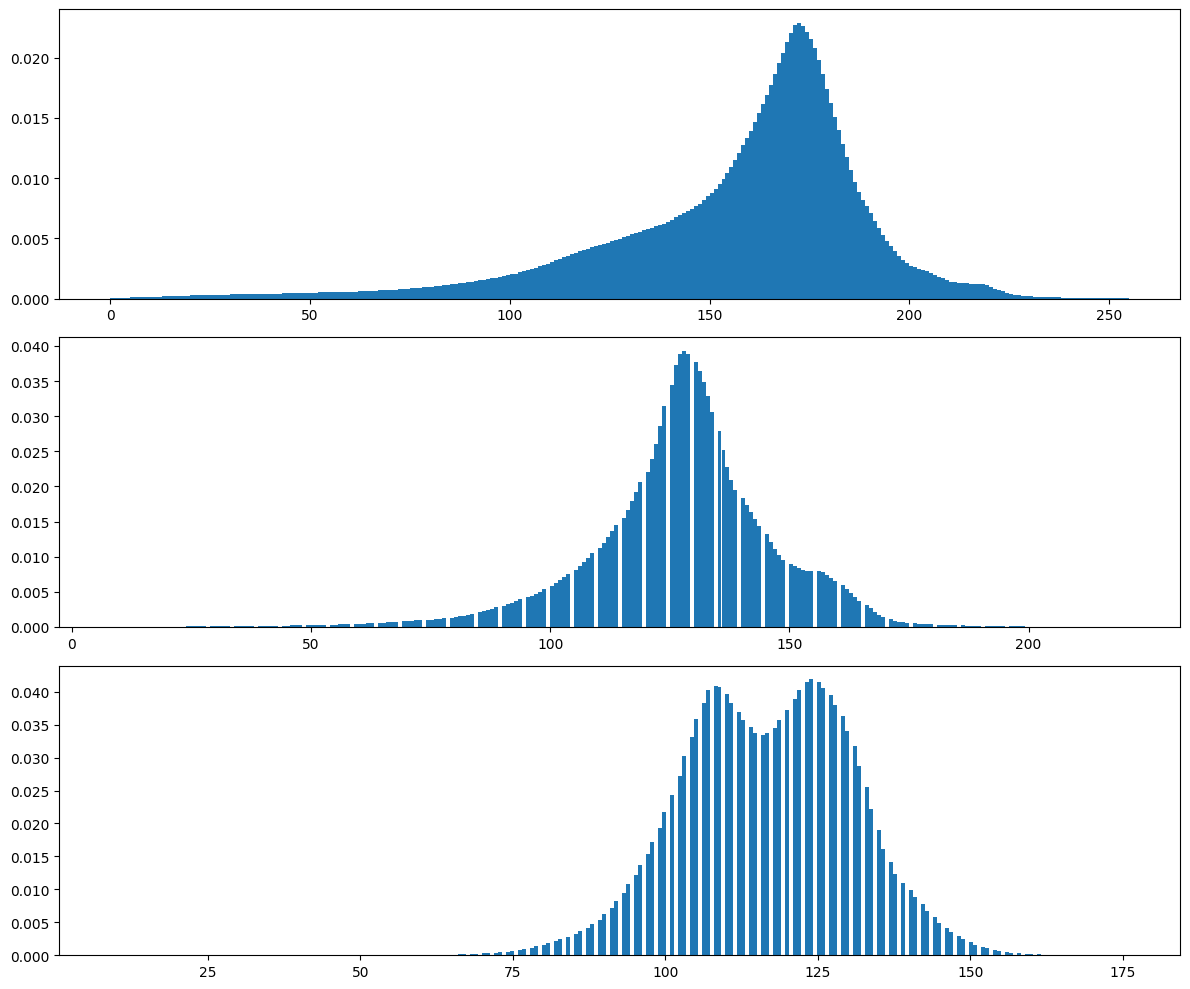

In [7]:
fig,ax = plt.subplots(3,1, figsize=(12, 10))

for i in range(3):
    ax[i].hist(x_pixel[:,i], bins=255, density=True)
fig.tight_layout()
plt.show()

# Music dataset

In [24]:
Ys, sampling_rates, files = get_dataset("instruments")

get_datasdet


/Users/paul/CS/mva/ml4ts/Dictionary-Learning/src/dataset/load_datasets.py:111: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, y = wavfile.read(file_path)


In [27]:
idxs = np.random.randint(0, len(Ys), 3)
for idx in idxs:
    signal = Ys[idx]
    rate = sampling_rates[idx]
    display(Audio(signal.flatten(), rate=rate))

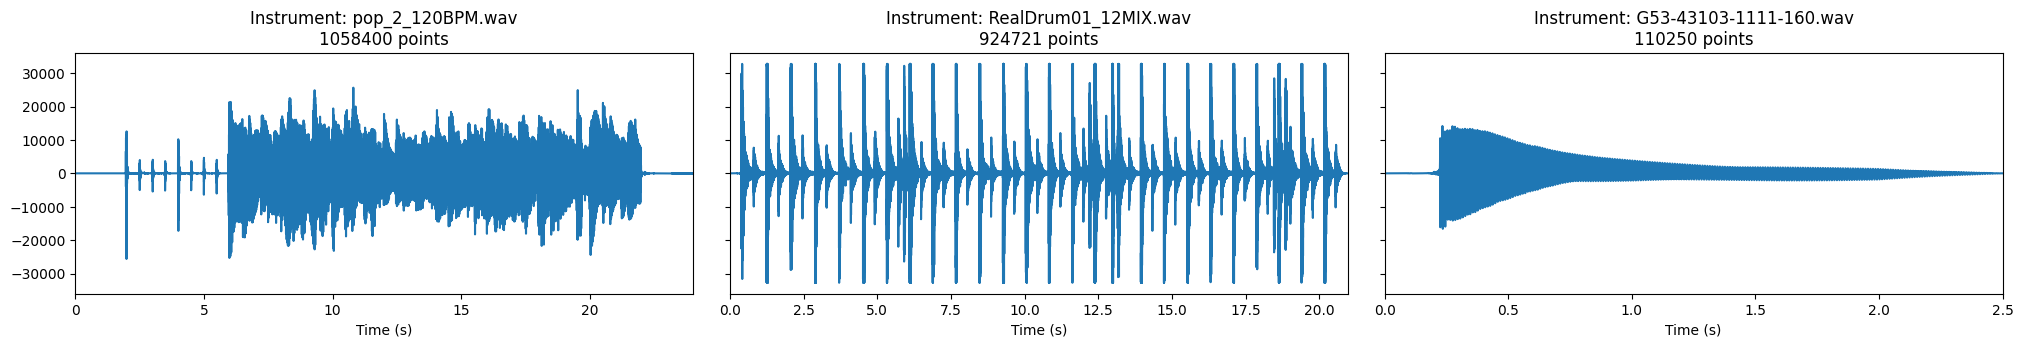

In [28]:
fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(20, 3), sharey=True)
fig.tight_layout()
for idx, ax in zip(idxs, ax_arr):
    s = Ys[idx].flatten()
    r = sampling_rates[idx]
    tt = np.arange(s.size) / r
    ax.plot(tt, s)
    ax.set_xlim(0, s.size / r)
    ax.set_xlabel("Time (s)")
    _ = ax.set_title(f"Instrument: {files[idx]}\n{len(s)} points")